In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)
# data = pd.read_sql_query('SELECT * FROM loan', engine)
# data.head()

In [12]:
query = '''select f.film_id, f.length, f.rental_duration, f.rental_rate, f.rating, c.category_id, c.name
from sakila.category c
join sakila.film_category fa on c.category_id = fa.category_id
join sakila.film f on fa.film_id = f.film_id
where c.category_id < 5;
'''

data = pd.read_sql_query(query, engine)
data.head()

,film_id,length,rental_duration,rental_rate,rating,category_id,name
0,19,113,6,0.99,PG,1,Action
1,21,129,3,4.99,R,1,Action
2,29,168,5,2.99,NC-17,1,Action
3,38,68,6,0.99,NC-17,1,Action
4,56,129,6,2.99,G,1,Action


In [19]:
data['name'].value_counts()

Animation    66
Action       64
Children     60
Classics     57
Name: name, dtype: int64

In [20]:
data.shape

(247, 7)

In [21]:
data.dtypes

film_id              int64
length               int64
rental_duration      int64
rental_rate        float64
rating              object
category_id          int64
name                object
dtype: object

In [22]:
data.isna().sum()

film_id            0
length             0
rental_duration    0
rental_rate        0
rating             0
category_id        0
name               0
dtype: int64

In [28]:
import numpy as np

In [29]:
x_cat = data.select_dtypes(include=np.object)
print(x_cat)

    rating      name
0       PG    Action
1        R    Action
2    NC-17    Action
3    NC-17    Action
4        G    Action
..     ...       ...
242  NC-17  Classics
243     PG  Classics
244  PG-13  Classics
245     PG  Classics
246  NC-17  Classics

[247 rows x 2 columns]


In [30]:
x_num = data.select_dtypes(include=np.number)
print(x_num)

     film_id  length  rental_duration  rental_rate  category_id
0         19     113                6         0.99            1
1         21     129                3         4.99            1
2         29     168                5         2.99            1
3         38      68                6         0.99            1
4         56     129                6         2.99            1
..       ...     ...              ...          ...          ...
242      899     144                7         0.99            4
243      950     132                7         4.99            4
244      951      78                6         0.99            4
245      962      85                7         2.99            4
246      970      52                7         0.99            4

[247 rows x 5 columns]


In [41]:
#x_cat['film_id'] = x_num['film_id'].astype('category')

In [42]:
#x_cat['film_id'] = x_cat['film_id'].cat.codes

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

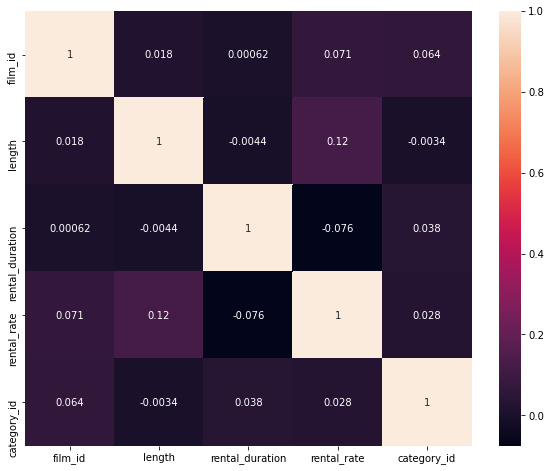

In [44]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()                                                #Q: does the correlation matrix only work on numericals? ehat is the use case

/Users/siljaloik/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


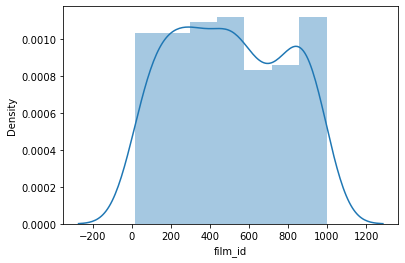

In [45]:
sns.distplot(data['film_id'])
plt.show()

/Users/siljaloik/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


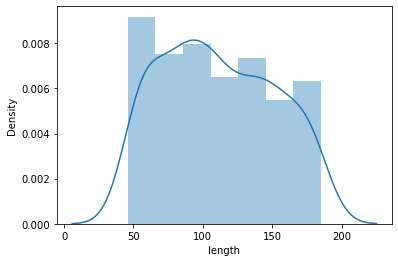

In [46]:
sns.distplot(data['length'])
plt.show()

/Users/siljaloik/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


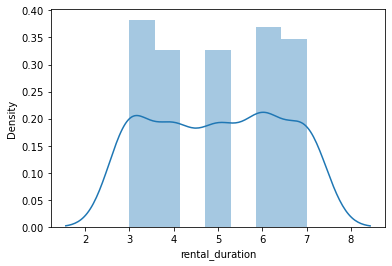

In [47]:
sns.distplot(data['rental_duration'])
plt.show()

/Users/siljaloik/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


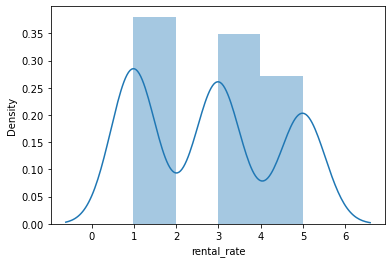

In [48]:
sns.distplot(data['rental_rate'])
plt.show()

In [ ]:
from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import StandardScaler
import numpy as np
x = data.select_dtypes(include = np.number)

In [50]:
from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import StandardScaler
import numpy as np
x = data.select_dtypes(include = np.number)

# Normalizing data
transformer = Normalizer().fit(x)
x_normalized = transformer.transform(x)
x = pd.DataFrame(x_normalized)

In [51]:
print(x)

            0         1         2         3         4
0    0.165575  0.984734  0.052287  0.008627  0.008714
1    0.160512  0.986001  0.022930  0.038141  0.007643
2    0.170001  0.984834  0.029311  0.017528  0.005862
3    0.486302  0.870224  0.076784  0.012669  0.012797
4    0.397744  0.916232  0.042615  0.021237  0.007103
..        ...       ...       ...       ...       ...
242  0.987374  0.158156  0.007688  0.001087  0.004393
243  0.990436  0.137618  0.007298  0.005202  0.004170
244  0.996624  0.081742  0.006288  0.001037  0.004192
245  0.996080  0.088011  0.007248  0.003096  0.004142
246  0.998531  0.053530  0.007206  0.001019  0.004118

[247 rows x 5 columns]


/Users/siljaloik/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


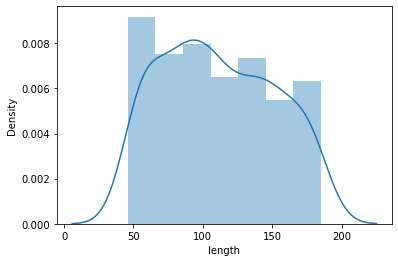

In [57]:
sns.distplot(data['length'])
plt.show()

/Users/siljaloik/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


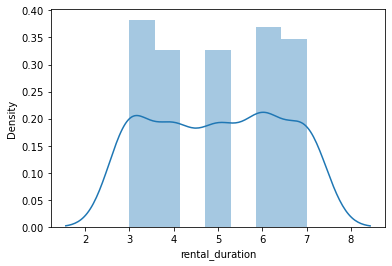

In [58]:
sns.distplot(data['rental_duration'])
plt.show()

/Users/siljaloik/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


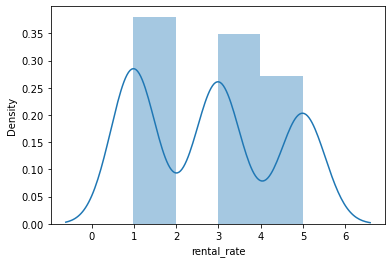

In [59]:
sns.distplot(data['rental_rate'])
plt.show()

In [52]:
cat = x_cat
cat = cat.drop(['name'], axis=1)
categorical = pd.get_dummies(cat, columns=['rating'])

In [53]:
print(categorical)

    film_id  rating_G  rating_NC-17  rating_PG  rating_PG-13  rating_R
0        19         0             0          1             0         0
1        21         0             0          0             0         1
2        29         0             1          0             0         0
3        38         0             1          0             0         0
4        56         1             0          0             0         0
..      ...       ...           ...        ...           ...       ...
242     899         0             1          0             0         0
243     950         0             0          1             0         0
244     951         0             0          0             1         0
245     962         0             0          1             0         0
246     970         0             1          0             0         0

[247 rows x 6 columns]


In [54]:
y = data['name']
X = np.concatenate((x, categorical), axis=1)

In [55]:
print(y)

0        Action
1        Action
2        Action
3        Action
4        Action
         ...   
242    Classics
243    Classics
244    Classics
245    Classics
246    Classics
Name: name, Length: 247, dtype: object


In [56]:
print(x)

            0         1         2         3         4
0    0.165575  0.984734  0.052287  0.008627  0.008714
1    0.160512  0.986001  0.022930  0.038141  0.007643
2    0.170001  0.984834  0.029311  0.017528  0.005862
3    0.486302  0.870224  0.076784  0.012669  0.012797
4    0.397744  0.916232  0.042615  0.021237  0.007103
..        ...       ...       ...       ...       ...
242  0.987374  0.158156  0.007688  0.001087  0.004393
243  0.990436  0.137618  0.007298  0.005202  0.004170
244  0.996624  0.081742  0.006288  0.001037  0.004192
245  0.996080  0.088011  0.007248  0.003096  0.004142
246  0.998531  0.053530  0.007206  0.001019  0.004118

[247 rows x 5 columns]


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [61]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

/Users/siljaloik/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
classification.score(X_test, y_test)

0.21212121212121213

In [63]:
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.21212121212121213

In [64]:
pd.Series(predictions).value_counts()

Action       46
Animation    42
Children     11
dtype: int64

In [65]:
y_test.value_counts()

Classics     28
Animation    25
Action       24
Children     22
Name: name, dtype: int64

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[11, 12,  1,  0],
       [12,  8,  5,  0],
       [ 8, 12,  2,  0],
       [15, 10,  3,  0]])

In [67]:
classification.predict_proba(X_test)

array([[0.48240541, 0.12770835, 0.23904442, 0.15084181],
       [0.18379964, 0.25507892, 0.32215819, 0.23896325],
       [0.47276479, 0.14491268, 0.22483021, 0.15749232],
       [0.19777838, 0.29917501, 0.28042851, 0.22261809],
       [0.27461741, 0.29632198, 0.27071109, 0.15834953],
       [0.37720437, 0.22433378, 0.19289813, 0.20556372],
       [0.41226549, 0.23629272, 0.17573343, 0.17570836],
       [0.2078141 , 0.33597298, 0.24851855, 0.20769437],
       [0.19560957, 0.31919357, 0.27085901, 0.21433786],
       [0.20675179, 0.4008497 , 0.22833518, 0.16406334],
       [0.19157424, 0.27183691, 0.30643084, 0.23015801],
       [0.41296046, 0.15690475, 0.2307022 , 0.1994326 ],
       [0.44253741, 0.17306107, 0.20531398, 0.17908754],
       [0.34920497, 0.1887165 , 0.23196852, 0.23011001],
       [0.38903274, 0.14990507, 0.24366227, 0.21739992],
       [0.17034588, 0.33017838, 0.28518214, 0.2142936 ],
       [0.44445792, 0.25339656, 0.15284449, 0.14930103],
       [0.42283385, 0.16406788,